In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#importacion del dataset
data=pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls",header=1)
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:

data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
##Renombramos la variable target
data.rename(columns={'default payment next month':'default_pnm'}, inplace = True)
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pnm
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
data=data.drop(columns=['ID'],axis=1)
data.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pnm
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [7]:
#Chequeamos si existen datos faltantes
data.isna().sum()

LIMIT_BAL      0
SEX            0
EDUCATION      0
MARRIAGE       0
AGE            0
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
default_pnm    0
dtype: int64

In [8]:
#chequemos si existen duplicadoa
print('El dataset cuenta con {} datos duplicados'.format(data.duplicated().sum()))

El dataset cuenta con 35 datos duplicados


In [ ]:
data=data.drop_duplicates()
print('El dataset cuenta con {} datos duplicados'.format(data.duplicated().sum()))

El dataset cuenta con 0 datos duplicados


## SEPARANDO DATOS

In [9]:
x=data.iloc[:,-1]
X = data.drop(columns=['default_pnm']).values
Y = data['default_pnm'].values
print (X.shape , Y.shape)

(30000, 23) (30000,)


### CREAMOS UNA FUNCION PARA GRAFICAR MATRIX DE CONFUSION Y PLOTEAR

In [10]:
from sklearn.metrics import confusion_matrix
def accplots(param,predict,train,xlabel):
    plt.plot(param,predict,'g')
    plt.plot(param,train,'b')
    plt.title('Variacion del  F1 Score')
    plt.xlabel(xlabel)
    plt.ylabel('F1 Score')
    plt.legend(('Prediction','Train'))
    plt.show()

def cfmatrix(ytest,ypredict,title):
    cfm = confusion_matrix(ytest,ypredict,labels=[0,1])
    sns.heatmap(cfm,annot=True,fmt='d')
    plt.xlabel('Label Predicha')
    plt.ylabel('Label Verdadera')
    plt.title(title)

#GRADIENT BOOSTING TREE

In [32]:
def experimentar_gbt(num_trees, X, Y):
    folds = 10
    skf = StratifiedKFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    balanceo=['BALANCEADO','DESBALANCEADO']
    for trees in num_trees:
        ## para almacenar los errores intermedios
        EficienciaTrain = []
        EficienciaVal = []
        accuracy = []
        Macc = []
        Mpre = []
        Mrec = []
        Mf1 = []

        EficienciaTrain_b = []
        EficienciaVal_b = []
        accuracy_b = []
        Macc_b = []
        Mpre_b = []
        Mrec_b = []
        Mf1_b = []
        
        for train, test in skf.split(X, Y):
            Xtrain = X[train,:]
            Ytrain = Y[train]
            Xtest = X[test,:]
            Ytest = Y[test]
            # Normalizando la data
            X_Train_Norm = MinMaxScaler().fit_transform(Xtrain)
            X_Test_Norm = MinMaxScaler().fit_transform(Xtest)
            for balanc in balanceo:
              if balanc == 'DESBALANCEADO':
                
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                modelo= GradientBoostingClassifier(n_estimators=trees)
                modelo.fit(X_Train_Norm, Ytrain)
                
                #predecir muestras de entrenamiento
                Ytrain_pred = modelo.predict(X_Train_Norm)
                #predecir muestras de pruebas
                Yest = modelo.predict(X_Test_Norm)
                #Evaluamos las predicciones del modelo con los datos de test
                EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
                EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
                accuracy.append(modelo.score(X_Test_Norm, Ytest))
                Macc.append(accuracy_score(Ytest, Yest))
                Mpre.append(precision_score(Ytest, Yest))
                Mrec.append(recall_score(Ytest, Yest))
                Mf1.append(f1_score(Ytest, Yest))
              else:
                #Submuestreo y sobremuestreo con SMOTE
                sm = SMOTE(random_state=42)
                X_train_oversampled, y_train_oversampled = sm.fit_sample(X_Train_Norm, Ytrain)
                
                modelo= GradientBoostingClassifier(n_estimators=trees)
                modelo.fit(X_train_oversampled, y_train_oversampled)
                
                #predecir muestras de entrenamiento
                Ytrain_pred = modelo.predict(X_Train_Norm)
                #predecir muestras de pruebas
                Yest = modelo.predict(X_Test_Norm)
                #Evaluamos las predicciones del modelo con los datos de test
                EficienciaTrain_b.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
                EficienciaVal_b.append(np.mean(Yest.ravel() == Ytest.ravel()))
                accuracy_b.append(modelo.score(X_Test_Norm, Ytest))
                Macc_b.append(accuracy_score(Ytest, Yest))
                Mpre_b.append(precision_score(Ytest, Yest))
                Mrec_b.append(recall_score(Ytest, Yest))
                Mf1_b.append(f1_score(Ytest, Yest))


        resultados.loc[idx,'número de arboles'] = trees
        resultados.loc[idx,'data'] = 'DESBALANCEADA'
        resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
        resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
        resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
        resultados.loc[idx,'desviacion estandar prueba'] = np.std(EficienciaVal)
        resultados.loc[idx,'accuracy real'] = np.mean(Macc)
        resultados.loc[idx,'precision_score'] = np.mean(Mpre)
        resultados.loc[idx,'recall_score'] = np.mean(Mrec)
        resultados.loc[idx,'f1_score'] = np.mean(Mf1)

        resultados.loc[idx+1,'número de arboles'] = trees
        resultados.loc[idx+1,'data'] = 'BALANCEADA_SMOTE'
        resultados.loc[idx+1,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain_b)
        resultados.loc[idx+1,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain_b)
        resultados.loc[idx+1,'eficiencia de prueba'] = np.mean(EficienciaVal_b)
        resultados.loc[idx+1,'desviacion estandar prueba'] = np.std(EficienciaVal_b)
        resultados.loc[idx+1,'accuracy real'] = np.mean(Macc_b)
        resultados.loc[idx+1,'precision_score'] = np.mean(Mpre_b)
        resultados.loc[idx+1,'recall_score'] = np.mean(Mrec_b)
        resultados.loc[idx+1,'f1_score'] = np.mean(Mf1_b)
        idx= idx +2
        
    return (resultados)

In [33]:
trees = [25,50,100,150]
experimentos_gbt= experimentar_gbt(trees, X, Y)
experimentos_gbt

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

,número de arboles,data,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba,accuracy real,precision_score,recall_score,f1_score
0,25.0,DESBALANCEADA,0.823226,0.000986,0.809467,0.009508,0.809467,0.681699,0.277254,0.383206
1,25.0,BALANCEADA_SMOTE,0.791663,0.002311,0.416033,0.114523,0.416033,0.264140,0.825214,0.390535
2,50.0,DESBALANCEADA,0.824359,0.001299,0.787933,0.031595,0.787933,0.567808,0.338862,0.406758
3,50.0,BALANCEADA_SMOTE,0.796504,0.001551,0.377233,0.125279,0.377233,0.257088,0.864998,0.386958
4,100.0,DESBALANCEADA,0.825900,0.001335,0.672000,0.105403,0.672000,0.383480,0.502235,0.406876
5,100.0,BALANCEADA_SMOTE,0.803467,0.001570,0.349900,0.122704,0.349900,0.248840,0.887594,0.382072
6,150.0,DESBALANCEADA,0.827704,0.001447,0.630900,0.104774,0.630900,0.345121,0.576375,0.407115
7,150.0,BALANCEADA_SMOTE,0.808500,0.002133,0.330700,0.116255,0.330700,0.243289,0.905370,0.378876


In [34]:
experimentos_gbt.sort_values('f1_score',ascending=False)

,número de arboles,data,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba,accuracy real,precision_score,recall_score,f1_score
0,25.0,DESBALANCEADA,0.823226,0.000986,0.809467,0.009508,0.809467,0.681699,0.277254,0.383206
2,50.0,DESBALANCEADA,0.824359,0.001299,0.787933,0.031595,0.787933,0.567808,0.338862,0.406758
4,100.0,DESBALANCEADA,0.825900,0.001335,0.672000,0.105403,0.672000,0.383480,0.502235,0.406876
6,150.0,DESBALANCEADA,0.827704,0.001447,0.630900,0.104774,0.630900,0.345121,0.576375,0.407115
1,25.0,BALANCEADA_SMOTE,0.791663,0.002311,0.416033,0.114523,0.416033,0.264140,0.825214,0.390535
3,50.0,BALANCEADA_SMOTE,0.796504,0.001551,0.377233,0.125279,0.377233,0.257088,0.864998,0.386958
5,100.0,BALANCEADA_SMOTE,0.803467,0.001570,0.349900,0.122704,0.349900,0.248840,0.887594,0.382072
7,150.0,BALANCEADA_SMOTE,0.808500,0.002133,0.330700,0.116255,0.330700,0.243289,0.905370,0.378876


#MAQUINAS DE SOPORTE VECTORIAL

In [45]:
import itertools
from sklearn.svm import SVC
    #EXPERIMIENTOS CON SVC
def experiementarSVC(x, y, kernels, gammas,params_reg):
    """función que realizar experimentos sobre un SVM para clasificación
    
    x: numpy.Array, con las caracteristicas del problema
    y: numpy.Array, con la variable objetivo
    kernels: List[str], lista con valores a pasar 
        a sklearn correspondiente al kernel de la SVM
    gammas: List[float], lista con los valores a pasar a
        sklean correspondiente el valor de los coeficientes para usar en el
        kernel
    params_reg: List[float], lista con los valores a a pasar a 
        sklearn para ser usados como parametro de regularización
    
    retorna: pd.Dataframe con las siguientes columnas:
        - 3 columnas con los tres parametros: kernel, gamma, param de regularizacion
        - error cuadratico medio en el cojunto entrenamiento (promedio de los 4 folds)
        - error cuadratico medio en el cojunto test (promedio de los 4 folds)
        - % de Vectores de Soporte promedio para los 4 folds (0 a 100)
    """
    idx = 0
    kf = StratifiedKFold(n_splits=4)
    # crear una lista con la combinaciones de los elementos de cada list
    kernels_gammas_regs = list(itertools.product(kernels, gammas, params_reg))
    resultados = pd.DataFrame()
    balanceo=['BALANCEADO','DESBALANCEADO']
    for params in kernels_gammas_regs:
        ## para almacenar los errores intermedios
        Macc = []
        Mpre = []
        Mrec = []
        Mf1 = []
        errores_train = []
        errores_test = []
        pct_support_vectors = []

        Macc_b = []
        Mpre_b = []
        Mrec_b = []
        Mf1_b = []
        errores_train_b = []
        errores_test_b = []
        pct_support_vectors_b = []



        kernel, gamma, param_reg = params
        print("parametros usados", params) # puede usar para ver los params
        
        for train_index, test_index in kf.split(x,y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]  
            # normalizar los datos
            
            X_train = MinMaxScaler().fit_transform(X_train)
            X_test = MinMaxScaler().fit_transform(X_test)

            for balanc in balanceo:
              if balanc == 'DESBALANCEADO':
                svm = SVC(kernel=kernel,gamma=gamma, C=param_reg)
                # Entrenar el modelo
                svm.fit(X=X_train, y=y_train)
                # calculo de errores
                y_train_pred = svm.predict(X=X_train)
                y_test_pred = svm.predict(X=X_test)
                # error y pct de vectores de soporte
                errores_train.append(accuracy_score(y_true = y_train, y_pred = y_train_pred))
                errores_test.append(accuracy_score(y_true = y_test, y_pred = y_test_pred))

                Macc.append(accuracy_score(y_test, y_test_pred))
                Mpre.append(precision_score(y_test,y_test_pred))
                Mrec.append(recall_score(y_test, y_test_pred))
                Mf1.append(f1_score(y_test, y_test_pred))
                # contar muestras de entrenamiento
                n_train = X_train.shape[0]
                pct_vs = (svm.support_vectors_.shape[0]/n_train)
                pct_support_vectors.append(pct_vs)

              else:

                #Submuestreo y sobremuestreo con SMOTE
                sm = SMOTE(random_state=42)
                X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)

                svm = SVC(kernel=kernel,gamma=gamma, C=param_reg)
                # Entrenar el modelo
                svm.fit(X=X_train_oversampled, y=y_train_oversampled)
                # calculo de errores
                y_train_pred = svm.predict(X=X_train)
                y_test_pred = svm.predict(X=X_test)
                # error y pct de vectores de soporte
                errores_train_b.append(accuracy_score(y_true = y_train, y_pred = y_train_pred))
                errores_test_b.append(accuracy_score(y_true = y_test, y_pred = y_test_pred))

                Macc_b.append(accuracy_score(y_test, y_test_pred))
                Mpre_b.append(precision_score(y_test,y_test_pred))
                Mrec_b.append(recall_score(y_test, y_test_pred))
                Mf1_b.append(f1_score(y_test, y_test_pred))
                # contar muestras de entrenamiento
                n_train = X_train.shape[0]
                pct_vs = (svm.support_vectors_.shape[0]/n_train)
                pct_support_vectors_b.append(pct_vs)

        
        resultados.loc[idx,'kernel'] = kernel
        resultados.loc[idx,'gamma'] = gamma
        resultados.loc[idx,'param_reg'] = param_reg
        resultados.loc[idx,'data'] = 'DESBALANCEADA'
        resultados.loc[idx,'accuracy real'] = np.mean(Macc)
        resultados.loc[idx,'precision_score'] = np.mean(Mpre)
        resultados.loc[idx,'recall_score'] = np.mean(Mrec)
        resultados.loc[idx,'f1_score'] = np.mean(Mf1)
        resultados.loc[idx,'error de entrenamiento'] = np.mean(errores_train)
        resultados.loc[idx,'error de prueba'] = np.mean(errores_test)
        resultados.loc[idx,'% de vectores de soporte'] = np.mean(pct_support_vectors)*100

        resultados.loc[idx+1,'kernel'] = kernel
        resultados.loc[idx+1,'gamma'] = gamma
        resultados.loc[idx+1,'param_reg'] = param_reg
        resultados.loc[idx,'data'] = 'BALANCEADA'
        resultados.loc[idx+1,'accuracy real'] = np.mean(Macc_b)
        resultados.loc[idx+1,'precision_score'] = np.mean(Mpre_b)
        resultados.loc[idx+1,'recall_score'] = np.mean(Mrec_b)
        resultados.loc[idx+1,'f1_score'] = np.mean(Mf1_b)
        resultados.loc[idx+1,'error de entrenamiento'] = np.mean(errores_train_b)
        resultados.loc[idx+1,'error de prueba'] = np.mean(errores_test_b)
        resultados.loc[idx+1,'% de vectores de soporte'] = np.mean(pct_support_vectors_b)*100

        idx+=2
    return (resultados)

In [47]:
experimentos_SVC= experiementarSVC(x = X,y=Y,
                                 kernels=['linear', 'rbf'],
                                 gammas = [0.01,0.1],
                                 params_reg = [0.01,0.1, 1.0]
                                )
experimentos_SVC

parametros usados ('linear', 0.01, 0.01)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter

parametros usados ('linear', 0.01, 0.1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


parametros usados ('linear', 0.01, 1.0)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

parametros usados ('linear', 0.1, 0.01)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter

parametros usados ('linear', 0.1, 0.1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


parametros usados ('linear', 0.1, 1.0)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

parametros usados ('rbf', 0.01, 0.01)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter

parametros usados ('rbf', 0.01, 0.1)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 

parametros usados ('rbf', 0.01, 1.0)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  

parametros usados ('rbf', 0.1, 0.01)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter

parametros usados ('rbf', 0.1, 0.1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


parametros usados ('rbf', 0.1, 1.0)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

,kernel,gamma,param_reg,accuracy real,precision_score,recall_score,f1_score,error de entrenamiento,error de prueba,% de vectores de soporte
0,linear,0.01,0.01,0.778800,0.000000,0.000000,0.000000,0.778800,0.778800,44.585556
1,linear,0.01,0.01,0.722500,0.436808,0.570374,0.482746,0.755222,0.722500,127.222222
2,linear,0.01,0.10,0.791900,0.596314,0.116034,0.176387,0.795533,0.791900,45.527778
3,linear,0.01,0.10,0.723633,0.461536,0.556661,0.483088,0.769267,0.723633,117.932222
4,linear,0.01,1.00,0.799833,0.641980,0.220012,0.298620,0.802800,0.799833,45.848889
5,linear,0.01,1.00,0.688567,0.434566,0.594937,0.467719,0.763244,0.688567,115.607778
6,linear,0.10,0.01,0.778800,0.000000,0.000000,0.000000,0.778800,0.778800,44.585556
7,linear,0.10,0.01,0.722500,0.436808,0.570374,0.482746,0.755222,0.722500,127.222222
8,linear,0.10,0.10,0.791900,0.596314,0.116034,0.176387,0.795533,0.791900,45.527778
9,linear,0.10,0.10,0.723633,0.461536,0.556661,0.483088,0.769267,0.723633,117.932222


In [105]:
experimentos_SVC.sort_values('f1_score',ascending=False)

,kernel,gamma,param_reg,accuracy real,precision_score,recall_score,f1_score,error de entrenamiento,error de prueba,% de vectores de soporte
23,rbf,0.10,1.00,0.735167,0.454060,0.584991,0.500059,0.780122,0.735167,112.671111
21,rbf,0.10,0.10,0.735033,0.464233,0.576703,0.497428,0.780933,0.735033,123.393333
17,rbf,0.01,1.00,0.728967,0.452029,0.567511,0.487948,0.767033,0.728967,123.348889
9,linear,0.10,0.10,0.723633,0.461536,0.556661,0.483088,0.769267,0.723633,117.932222
3,linear,0.01,0.10,0.723633,0.461536,0.556661,0.483088,0.769267,0.723633,117.932222
7,linear,0.10,0.01,0.722500,0.436808,0.570374,0.482746,0.755222,0.722500,127.222222
1,linear,0.01,0.01,0.722500,0.436808,0.570374,0.482746,0.755222,0.722500,127.222222
19,rbf,0.10,0.01,0.701800,0.402193,0.584690,0.467951,0.736200,0.701800,141.268889
5,linear,0.01,1.00,0.688567,0.434566,0.594937,0.467719,0.763244,0.688567,115.607778
11,linear,0.10,1.00,0.688567,0.434566,0.594937,0.467719,0.763244,0.688567,115.607778


REDES NEURONALES


In [70]:
from sklearn.neural_network import MLPClassifier
def experimetar_mlpc(X,Y, num_hidden_layers, num_neurons):
    """ función para realizar experimentos con el MLP
    x: matriz de numpy con caracteristicas
    y: vector numpy con las variables a predecir
    num_hidden_layers: list de enteros con el numero de capdas
        ocultas a usar
    num_neurons: list de enteros con el numero de neuronas a usar
    
    Retorna: dataframe con 8 columnas:
        - numero de capas, numero de neuronas
        -metricas de desempeño      
    """
    #Validamos el modelo
    Folds = 4
    skf = StratifiedKFold(n_splits=Folds)
    resultados = pd.DataFrame()
    idx = 0
    balanceo=['BALANCEADO','DESBALANCEADO']
    for hidden_layers in num_hidden_layers:
        Mpre = []
        Mrec = []
        Mf1 = []
        Macc = []

        Mpre_b = []
        Mrec_b = []
        Mf1_b = []
        Macc_b = []
        for neurons in num_neurons:
            for j, (train, test) in enumerate(skf.split(X, Y)):
                
                Xtrain= X[train,:]
                Ytrain = Y[train]
                Xtest = X[test, :]
                Ytest = Y[test]
                #Normalizamos los datos
                     
                Xtrain = MinMaxScaler().fit_transform(Xtrain)
                Xtest = MinMaxScaler().fit_transform(Xtest)
                for balanc in balanceo:
                  if balanc == 'DESBALANCEADO':
                    #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                    
                    hidden_layer_sizes = tuple(hidden_layers * [neurons])
                    #print(hidden_layer_sizes)
                    mlp = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, activation='tanh',max_iter=400)
                    # entrenar el MLP
                    mlp.fit(X=Xtrain, y=Ytrain)
                    #para hacer predicciones sobre el conjunto Xtest
                    Yest = mlp.predict(Xtest)
                   
                    
                    Macc.append(accuracy_score(Ytest, Yest))
                    Mpre.append(precision_score(Ytest,Yest))
                    Mrec.append(recall_score(Ytest, Yest))
                    Mf1.append(f1_score(Ytest, Yest))
                  else:
                    #Submuestreo y sobremuestreo con SMOTE
                    sm = SMOTE(random_state=42)
                    X_train_oversampled, y_train_oversampled = sm.fit_sample(Xtrain, Ytrain)

                    hidden_layer_sizes = tuple(hidden_layers * [neurons])
                    #print(hidden_layer_sizes)
                    mlp = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, activation='tanh',max_iter=400)
                    # entrenar el MLP
                    mlp.fit(X=X_train_oversampled, y=y_train_oversampled)
                    #Use para el modelo para hacer predicciones sobre el conjunto Xtest
                    Yest = mlp.predict(Xtest)
                    #Mida el error absoluto medio para cada una de las dos salidas
                    #Observe bien la documentación. recordar que esta resolviendo
                    # un problema de multiples salidas
                    Macc_b.append(accuracy_score(Ytest, Yest))
                    Mpre_b.append(precision_score(Ytest,Yest))
                    Mrec_b.append(recall_score(Ytest, Yest))
                    Mf1_b.append(f1_score(Ytest, Yest))
      
        
            resultados.loc[idx,'capas ocultas'] = hidden_layers
            resultados.loc[idx,'neuronas en capas ocultas'] = neurons 
            resultados.loc[idx,'data'] = 'DESBALANCEADA'
            resultados.loc[idx,'accuracy'] = np.mean(Macc)
            resultados.loc[idx,'precision_score'] = np.mean(Mpre)
            resultados.loc[idx,'recall_score'] = np.mean(Mrec)
            resultados.loc[idx,'f1_score'] = np.mean(Mf1)
            resultados.loc[idx,'intervalo de confianza'] = np.std(Macc)

            resultados.loc[idx+1,'capas ocultas'] = hidden_layers
            resultados.loc[idx+1,'neuronas en capas ocultas'] = neurons 
            resultados.loc[idx+1,'data'] = 'BALANCEADA'
            resultados.loc[idx+1,'accuracy'] = np.mean(Macc_b)
            resultados.loc[idx+1,'precision_score'] = np.mean(Mpre_b)
            resultados.loc[idx+1,'recall_score'] = np.mean(Mrec_b)
            resultados.loc[idx+1,'f1_score'] = np.mean(Mf1_b)
            resultados.loc[idx+1,'intervalo de confianza'] = np.std(Macc_b)
            idx+=2
    return (resultados)

In [ ]:
resultados_mlpc = experimetar_mlpc(X, Y, [1,2], [12,16,20,24])
resultados_mlpc 

In [72]:
resultados_mlpc.sort_values('f1_score',ascending=False)

,capas ocultas,neuronas en capas ocultas,data,accuracy,precision_score,recall_score,f1_score,intervalo de confianza
9,2.0,12.0,BALANCEADA,0.695067,0.423327,0.642556,0.493335,0.115669
10,2.0,16.0,DESBALANCEADA,0.804250,0.614514,0.428571,0.490596,0.032673
6,1.0,24.0,DESBALANCEADA,0.806192,0.610274,0.420321,0.487350,0.025822
0,1.0,12.0,DESBALANCEADA,0.815833,0.637139,0.399638,0.487188,0.009574
2,1.0,16.0,DESBALANCEADA,0.811867,0.621281,0.408303,0.487030,0.013264
8,2.0,12.0,DESBALANCEADA,0.798733,0.605457,0.433092,0.486957,0.039908
12,2.0,20.0,DESBALANCEADA,0.798156,0.610769,0.433544,0.486690,0.045842
4,1.0,20.0,DESBALANCEADA,0.808767,0.616977,0.413552,0.486562,0.022294
11,2.0,16.0,BALANCEADA,0.679517,0.408634,0.652878,0.485703,0.125546
14,2.0,24.0,DESBALANCEADA,0.795608,0.606028,0.436671,0.485521,0.048307


#VENTANA DE PARZEN

In [79]:
import scipy as sc
def kernel_gaussiano(x):
    """Calcula el kernel gaussiano de x
    x: matriz/vector de numpy
    retorna: el valor de de kernel gaussiano
    """
    return np.exp((-0.5)*x**2)

def ParzenWindow(x,Data,h):
    """ventana de parzen
    x: vector con representando una sola muestra
    Data: vector de muestras de entrenamiento
    h: ancho de la ventana de kernel
    retorna: el valor de ventana de parzen para una muestra
    """
    h = h
    Ns = Data.shape[0]
    suma = 0
    for k in range(Ns):
        u = sc.spatial.distance.euclidean(x,Data[k,:])
        suma += kernel_gaussiano(u/h)
    return suma

In [80]:
def parzenClass(X_train, Y_train, X_test, ancho_h):
    """ Funcion que implementa metodo de ventana de parzen para
        para clasificación
    X_train: es la matriz con las muestras de entrenamiento
    Y_train: es un vector con los valores de salida pra cada una de las muestras de entrenamiento
    X_test: es la matriz con las muestras de validación
    h (float): ancho de h de la ventana
    retorna: - las estimaciones del modelo parzen para el conjunto X_test 
              esta matriz debe tener un shape de [row/muestras de X_test]
             - las probabilidades de la vetana [row/muestras de X_test, numero de clases]  
    """
    ancho_h
    Nv = len(X_test)
    Y_est = np.array([])
    
    X_clases = []
    
    for clase in np.unique(Y_train):
        X_clases.append(X_train[np.where(Y_train == clase )])    

    probabilidades = []
    j = 0
    for x_clase in X_clases: 
        distances = sc.spatial.distance_matrix(X_test, x_clase) / ancho_h
        
        for i in range(Nv):
            k = kernel_gaussiano(distances[i])
            P = np.sum(k)
            if(j == 0):
                probabilidades.append([P, 0.0, 0.0])
            else:
                probabilidades[i][j] = P
        j += 1   
    
    for p in probabilidades:
        Y_est = np.append(Y_est,p.index(max(p)))
    return Y_est

In [81]:
#ejercicio de codigo
def experimentarParzen (X, Y, hs):
    """Función que realiza los experimentos con knn usando
       una estrategia de validacion entrenamiento y pruebas
    X: matriz de numpy conjunto con muestras y caracteristicas
    Y: vector de numpy con los valores de las etiquetas
    ks: List[int/float] lista con los valores de k-vecinos a usar
    retorna: dataframe con los resultados, debe contener las siguientes columnas:
        - el ancho de ventana, el error medio de prueba, la desviacion estandar del error
    """
    
    
    # se usa la función para implementar la estrategia de validación.
    skf = StratifiedKFold(n_splits=5)
    resultados = pd.DataFrame()
    idx = 0
    balanceo=['BALANCEADO','DESBALANCEADO']
    # iteramos sobre los valores de hs
    for h in hs:
        # lista para almacenar los errores de cada iteración
        # de la validación
        
        Macc = []
        EficienciaVal = []
        Macc = []
        Mpre = []
        Mrec = []
        Mf1 = []

        Macc_b = []
        EficienciaVal_b = []
        Macc_b = []
        Mpre_b = []
        Mrec_b = []
        Mf1_b = []
        for train, test in skf.split(X, Y):
            Xtrain = X[train,:]
            Ytrain = Y[train]
            Xtest = X[test,:]
            Ytest = Y[test]
            #normalizamos los datos
            Xtrain = MinMaxScaler().fit_transform(Xtrain)
            Xtest = MinMaxScaler().fit_transform(Xtest)
            for balanc in balanceo:

              if balanc == 'DESBALANCEADO':

                Yest = parzenClass(Xtrain, Ytrain, Xtest, h)
                Macc.append(accuracy_score(Ytest, Yest))
                Mpre.append(precision_score(Ytest, Yest))
                Mrec.append(recall_score(Ytest, Yest))
                Mf1.append(f1_score(Ytest, Yest))
                EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
              else:
                sm = SMOTE(random_state=42)
                X_train_oversampled, y_train_oversampled = sm.fit_sample(Xtrain, Ytrain)
                Yest = parzenClass(X_train_oversampled, y_train_oversampled, Xtest, h)
                Macc_b.append(accuracy_score(Ytest, Yest))
                Mpre_b.append(precision_score(Ytest, Yest))
                Mrec_b.append(recall_score(Ytest, Yest))
                Mf1_b.append(f1_score(Ytest, Yest))
                EficienciaVal_b.append(np.mean(Yest.ravel() == Ytest.ravel()))
      
        resultados.loc[idx,'ancho de ventana'] = h
        resultados.loc[idx,'data'] = 'DESBALANCEADO'
        resultados.loc[idx,'accuracy'] = np.mean(Macc)
        resultados.loc[idx,'precision'] = np.mean(Mpre)
        resultados.loc[idx,'recall'] = np.mean(Mrec)
        resultados.loc[idx,'f1_score'] = np.mean(Mf1)
        resultados.loc[idx,'Intervalo de confianza'] = np.std(EficienciaVal)

        resultados.loc[idx+1,'ancho de ventana'] = h
        resultados.loc[idx+1,'data'] = 'BALANCEADO'
        resultados.loc[idx+1,'accuracy'] = np.mean(Macc_b)
        resultados.loc[idx+1,'precision'] = np.mean(Mpre_b)
        resultados.loc[idx+1,'recall'] = np.mean(Mrec_b)
        resultados.loc[idx+1,'f1_score'] = np.mean(Mf1_b)
        resultados.loc[idx+1,'Intervalo de confianza'] = np.std(EficienciaVal_b)
        idx+=2
    return (resultados)

#ANALISIS DISCRIMINANTE CUADRATICO


In [76]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from IPython.display import clear_output
def experiementar_QDA(x, y, params_reg,tol):
  
    idx = 0
    skf = StratifiedKFold(n_splits=5)
    # crear una lista con la combinaciones de los elementos de cada list
    resultados = pd.DataFrame()
    tol_regs = list(itertools.product(tol ,params_reg))
    
    balanceo=['BALANCEADO','DESBALANCEADO']
    for params in tol_regs:
        tol, param_reg = params
        errores_train = []
        errores_test = []

        EficienciaVal = []
        Macc = []
        Mpre = []
        Mrec = []
        Mf1 = []

        errores_train_b = []
        errores_test_b = []

        EficienciaVal_b = []
        Macc_b = []
        Mpre_b = []
        Mrec_b = []
        Mf1_b = []
        for train_index, test_index in skf.split(x,y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]  
            # normalizar los datos
             
            X_train = MinMaxScaler().fit_transform(X_train)
            X_test = MinMaxScaler().fit_transform(X_test)

            for balanc in balanceo:
              if balanc == 'DESBALANCEADO':
                clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=param_reg, tol=tol) 
                # Entrenar el modelo
                clf.fit(X_train, y_train)
                # calculo de errores
                y_test_pred = clf.predict(X_test)
                y_train_pred = clf.predict(X_train)
                
                # error y pct de vectores de soporte
                errores_train.append(accuracy_score(y_true = y_train, y_pred = y_train_pred))
                errores_test.append(accuracy_score(y_true = y_test, y_pred = y_test_pred))
                # contar muestras de entrenamiento
                #ypredict.append((y_test_pred))
                #ytesetes.append((y_test))
                Macc.append(accuracy_score(y_test, y_test_pred))
                Mpre.append(precision_score(y_test, y_test_pred))
                Mrec.append(recall_score(y_test, y_test_pred))
                EficienciaVal.append(np.mean(y_test_pred.ravel() == y_test.ravel()))
                Mf1.append(f1_score(y_test, y_test_pred))
                clear_output(wait=True)
              else:

                #Submuestreo y sobremuestreo con SMOTE
                sm = SMOTE(random_state=42)
                X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)

                clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=param_reg, tol=tol) 
                # Entrenar el modelo
                clf.fit(X_train_oversampled, y_train_oversampled)
                # calculo de errores
                y_test_pred = clf.predict(X_test)
                y_train_pred = clf.predict(X_train)
                
                # error y pct de vectores de soporte
                errores_train_b.append(accuracy_score(y_true = y_train, y_pred = y_train_pred))
                errores_test_b.append(accuracy_score(y_true = y_test, y_pred = y_test_pred))
                # contar muestras de entrenamiento
                #ypredict.append((y_test_pred))
                #ytesetes.append((y_test))
                Macc_b.append(accuracy_score(y_test, y_test_pred))
                Mpre_b.append(precision_score(y_test, y_test_pred))
                Mrec_b.append(recall_score(y_test, y_test_pred))
                EficienciaVal_b.append(np.mean(y_test_pred.ravel() == y_test.ravel()))
                Mf1_b.append(f1_score(y_test, y_test_pred))
                clear_output(wait=True)

    

        resultados.loc[idx,'param_reg'] = param_reg
        resultados.loc[idx,'tol'] = tol
        resultados.loc[idx,'data'] = 'DESBALANCEADA'
        resultados.loc[idx,'error de entrenamiento'] = np.mean(errores_train)
        resultados.loc[idx,'error de prueba'] = np.mean(errores_test)
        resultados.loc[idx,'accuracy real'] = np.mean(Macc)
        resultados.loc[idx,'Intervalo de confianza prueba'] = np.std(EficienciaVal)
        resultados.loc[idx,'precision_score'] = np.mean(Mpre)
        resultados.loc[idx,'recall_score'] = np.mean(Mrec)
        resultados.loc[idx,'f1_score'] = np.mean(Mf1)

        resultados.loc[idx+1,'param_reg'] = param_reg
        resultados.loc[idx+1,'tol'] = tol
        resultados.loc[idx+1,'data'] = 'BALANCEADA'
        resultados.loc[idx+1,'error de entrenamiento'] = np.mean(errores_train_b)
        resultados.loc[idx+1,'error de prueba'] = np.mean(errores_test_b)
        resultados.loc[idx+1,'accuracy real'] = np.mean(Macc_b)
        resultados.loc[idx+1,'Intervalo de confianza prueba'] = np.std(EficienciaVal_b)
        resultados.loc[idx+1,'precision_score'] = np.mean(Mpre_b)
        resultados.loc[idx+1,'recall_score'] = np.mean(Mrec_b)
        resultados.loc[idx+1,'f1_score'] = np.mean(Mf1_b)
        
        idx+=2
    return (resultados)

In [ ]:
resultados_QDA = experiementar_QDA(x =X ,y=Y,params_reg = [0.001, 0.01,0.1, 1],
                                 tol = [0.0001, 0.001,0.01, 0.1,1]
                                )

resultados_QDA

In [87]:
resultados_QDA.drop(columns=['error de entrenamiento','error de prueba']).sort_values('accuracy real',ascending=False)

,param_reg,tol,data,accuracy real,Intervalo de confianza prueba,precision_score,recall_score,f1_score
2,0.010,0.0001,DESBALANCEADA,0.804133,0.006474,0.636933,0.272446,0.379006
34,0.010,1.0000,DESBALANCEADA,0.804133,0.006474,0.636933,0.272446,0.379006
26,0.010,0.1000,DESBALANCEADA,0.804133,0.006474,0.636933,0.272446,0.379006
10,0.010,0.0010,DESBALANCEADA,0.804133,0.006474,0.636933,0.272446,0.379006
18,0.010,0.0100,DESBALANCEADA,0.804133,0.006474,0.636933,0.272446,0.379006
0,0.001,0.0001,DESBALANCEADA,0.786933,0.006269,0.523511,0.427820,0.468445
16,0.001,0.0100,DESBALANCEADA,0.786933,0.006269,0.523511,0.427820,0.468445
32,0.001,1.0000,DESBALANCEADA,0.786933,0.006269,0.523511,0.427820,0.468445
8,0.001,0.0010,DESBALANCEADA,0.786933,0.006269,0.523511,0.427820,0.468445
24,0.001,0.1000,DESBALANCEADA,0.786933,0.006269,0.523511,0.427820,0.468445


#SLECCION DE CARACTERISTICAS

In [ ]:
sns.pairplot(data)

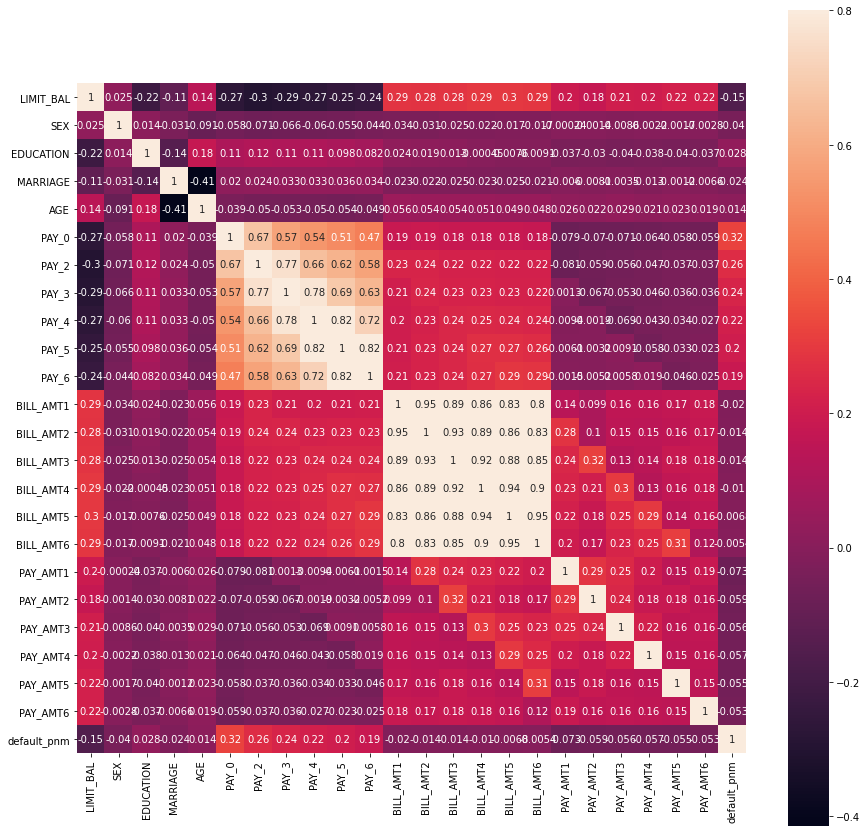

In [99]:

# taking all rows but only 6 columns


#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

#SELECCION DE ATRIBUTOS

In [104]:
from sklearn.feature_selection import SelectKBest, f_classif
# Aplicando el algoritmo univariante de prueba F.
k = 15  # número de atributos a seleccionar
columnas = list(data.drop(['default_pnm'],axis=1).columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(data.drop(['default_pnm'],axis=1), data['default_pnm'])
atrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

##SFS para SVC

Teniendo en cuenta que para el modelo SVC el mejor resultado fue con los parametros kernel= rbf,  gamma=	0.10	c= 1.00	.

Haremos el experimento para seleccion de caraxctewristicas con dichos valores.

In [ ]:
from tabulate import tabulate
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

resultadosCaracteristicas = pd.DataFrame()
caracteristicas = [10,14,18,23]
indexx = 0
for carac in caracteristicas:
    svm = SVC(kernel='rbf', gamma=0.01, C= 10)
    # Seleccion secuencial hacia adelante
    sfs = SFS(svm, 
              k_features=carac, 
              forward=True, 
              floating=False, 
              scoring='f1',
              cv=5,
              n_jobs=-1)
    sfs = sfs.fit(X,Y)
    resultadosCaracteristicas.loc[indexx,'Nombre'] = "Seleccion secuencial hacia adelante"
    resultadosCaracteristicas.loc[indexx,'caracteristicas'] = carac
    resultadosCaracteristicas.loc[indexx,'caracteristicas elegidas'] = str(sfs.k_feature_idx_)
    resultadosCaracteristicas.loc[indexx,'CV score'] = sfs.k_score_
    indexx+=1

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


##SFS para GBT

In [ ]:
Teniendo en cuenta que para el modelo SVC el mejor resultado fue con los parametros kernel= rbf,  gamma=	0.10	c= 1.00	.

Haremos el experimento para seleccion de caraxctewristicas con dichos valores.

In [ ]:
from tabulate import tabulate
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

resultadosCaracteristicas = pd.DataFrame()
caracteristicas = [10,14,18,23]
indexx = 0
for carac in caracteristicas:
    gbt = SVC(kernel='rbf', gamma=0.01, C= 10)
    # Seleccion secuencial hacia adelante
    sfs = SFS(gbt, 
              k_features=carac, 
              forward=True, 
              floating=False, 
              scoring='f1',
              cv=5,
              n_jobs=-1)
    sfs = sfs.fit(X,Y)
    resultadosCaracteristicas.loc[indexx,'Nombre'] = "Seleccion secuencial hacia adelante"
    resultadosCaracteristicas.loc[indexx,'caracteristicas'] = carac
    resultadosCaracteristicas.loc[indexx,'caracteristicas elegidas'] = str(sfs.k_feature_idx_)
    resultadosCaracteristicas.loc[indexx,'CV score'] = sfs.k_score_
    indexx+=1

In [ ]:
#NORMALIZAR
def calcularMatrizCF(matris,titulo):
  a = (matris[0,0] +  matris[0,1])
  b = (matris[1,0] +  matris[1,1])
  matris[0,0] =  matris[0,0] / a
  matris[0,1] =  matris[0,1] / a
  matris[1,0] =  matris[1,0] / b
  matris[1,1] =  matris[1,1] / b
  #MATRIZ DE CONFUSION
  sns.heatmap(matris,annot=True)
  plt.xlabel('Label Predicha')
  plt.ylabel('Label Verdadera')
  plt.title(titulo)
  print(matris)

## EXPERIMENTANDO - SOPORTE VECTORIAL - DATA DESBALANCEADA

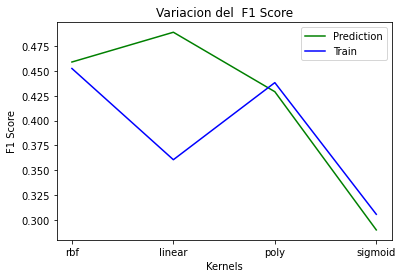

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
kernels,score_train,score_predict = ['rbf','linear','poly','sigmoid'],[],[]
for kernel in kernels:
    svc = SVC(kernel=kernel)
    svc.fit(mms_xtrain,y_train)
    y_ptrain = svc.predict(mms_xtrain)
    y_predict = svc.predict(mms_xtest)
    score_train.append(round(metrics.f1_score(y_train,y_ptrain),4))
    score_predict.append(round(metrics.f1_score(y_test,y_predict),4))
accplots(kernels,score_predict,score_train,'Kernels')

vemos que entre 'rbf' y 'poly' el modelo se puede ajustar mejor, tomamos uno de los dos para observar el rendimiento del modelo SVC.

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4665
           1       0.67      0.35      0.46      1328

    accuracy                           0.82      5993
   macro avg       0.75      0.65      0.67      5993
weighted avg       0.80      0.82      0.79      5993



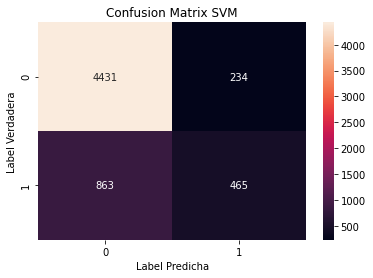

In [ ]:
#RENDIMIENTO DEL SVC CON DATOS DESBALANCEADOS:
svc = SVC(kernel='rbf')
svc.fit(mms_xtrain,y_train)
y_predict = svc.predict(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix SVM')
print(metrics.classification_report(y_test,y_predict))

## SOPORTE VECTORIAL - DATA BALANCEADA

In [ ]:
from imblearn.over_sampling import SMOTE
df_smote,smote_ytrain = SMOTE(random_state=1234).fit_sample(x_train,y_train)
#print(df_smote['default_pnm'].value_counts())
#df_smote['AGE'] = df_smote['AGE'].fillna(df_smote['AGE'].mode()[0])
print(df_smote)
smote_xtrain = MinMaxScaler().fit_transform(df_smote)
smote_xtrain

**RENDIMIENTO SVC DATA BALANCIADA**


              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4665
           1       0.48      0.47      0.47      1328

    accuracy                           0.77      5993
   macro avg       0.66      0.66      0.66      5993
weighted avg       0.77      0.77      0.77      5993



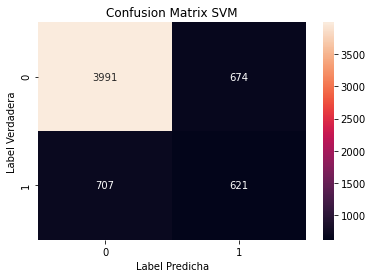

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(smote_xtrain,smote_ytrain)
y_predict = svc.predict(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix SVM')
print(metrics.classification_report(y_test,y_predict))

Se observa que no ubo mejora en cuanto al rendimiento haciendo un balanceo de datos

## DECISION TREE - DATA DESBALANCEADA

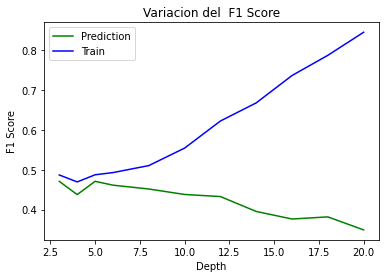

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
depths,score_train,score_predict = [3,4,5,6,8,10,12,14,16,18,20],[],[]
for depth in depths:
    dtc = DecisionTreeClassifier(criterion='entropy',max_depth=depth)
    dtc.fit(mms_xtrain,y_train)
    y_ptrain = dtc.predict(mms_xtrain)
    y_predict = dtc.predict(mms_xtest)
    score_train.append(round(metrics.f1_score(y_train,y_ptrain),4))
    score_predict.append(round(metrics.f1_score(y_test,y_predict),4))
accplots(depths,score_predict,score_train,'Depth')

SE PUEDE OBSERVAR QUE EL MODELO SE AJUSTA MEJOR USANDO UNA PROFUNDIDAD DEL ARBOL DE 5

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4665
           1       0.61      0.38      0.47      1328

    accuracy                           0.81      5993
   macro avg       0.73      0.66      0.68      5993
weighted avg       0.79      0.81      0.79      5993

Log Loss: 1.1134572253658779


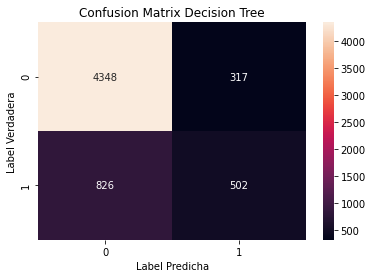

In [ ]:
#RENDIMIENTO DECISION TREE
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(mms_xtrain,y_train)
y_predict = dtc.predict(mms_xtest)
probab = dtc.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Decision Tree')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:',metrics.log_loss(y_test,probab))

**RENDIMIENTO DECISION TREE DATA BALANCIADA**


              precision    recall  f1-score   support

           0       0.86      0.78      0.81      4665
           1       0.41      0.54      0.46      1328

    accuracy                           0.72      5993
   macro avg       0.63      0.66      0.64      5993
weighted avg       0.76      0.72      0.74      5993



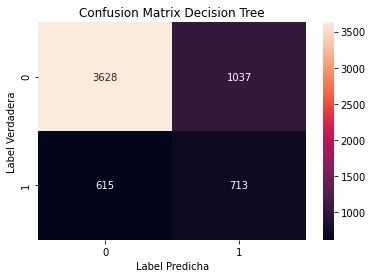

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(smote_xtrain,smote_ytrain)
y_predict = dtc.predict(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Decision Tree')
print(metrics.classification_report(y_test,y_predict))


### GRADIENT BOOSTED TREE

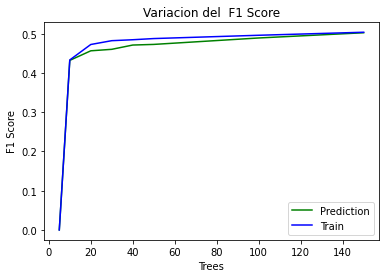

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
num_trees,score_train,score_predict = [5,10,20,30,40,50,100,150],[],[]
for trees in num_trees:
    modelo= GradientBoostingClassifier(n_estimators=trees)
    modelo.fit(mms_xtrain,y_train)
    y_ptrain = modelo.predict(mms_xtrain)
    y_predict = modelo.predict(mms_xtest)
    score_train.append(round(metrics.f1_score(y_train,y_ptrain),4))
    score_predict.append(round(metrics.f1_score(y_test,y_predict),4))
accplots(num_trees,score_predict,score_train,'Trees')

Vemos que despues de 120 arboles el modelo empieza a obtener los mejores rendimientos.

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4665
           1       0.61      0.41      0.49      1328

    accuracy                           0.81      5993
   macro avg       0.73      0.67      0.69      5993
weighted avg       0.79      0.81      0.80      5993



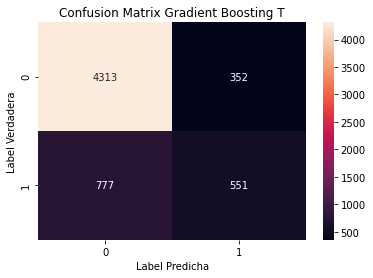

In [ ]:
#RENDIMIENTO GRADIENT BOOSTED TREE
modelo= GradientBoostingClassifier(n_estimators=120)# con 120 arboles 
modelo.fit(mms_xtrain,y_train)
y_predict = modelo.predict(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Gradient Boosting T')
print(metrics.classification_report(y_test,y_predict))


**RENDIMIENTO GRADIENT BOOSTING TREE - DATA BALANCIADA**

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      4665
           1       0.46      0.52      0.49      1328

    accuracy                           0.76      5993
   macro avg       0.66      0.67      0.66      5993
weighted avg       0.77      0.76      0.76      5993



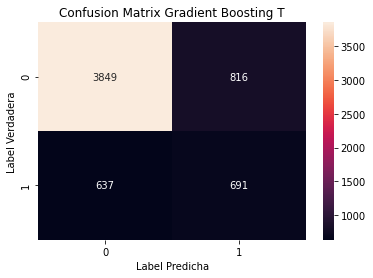

In [ ]:
#RENDIMIENTO GRADIENT BOOSTED TREE
modelo= GradientBoostingClassifier(n_estimators=120)# con 120 arboles 
modelo.fit(smote_xtrain,smote_ytrain)
y_predict = modelo.predict(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Gradient Boosting T')
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      4665
           1       0.46      0.52      0.49      1328

    accuracy                           0.76      5993
   macro avg       0.66      0.67      0.66      5993
weighted avg       0.77      0.76      0.76      5993



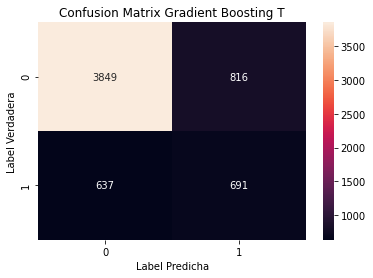

In [ ]:
#RENDIMIENTO GRADIENT BOOSTED TREE
mlp = MLPClassifier(hidden_layer_sizes = tuple(2 * [24]), activation='tanh', max_iter=400)
# entrenar el MLP
mlp.fit(mms_xtrain,y_train)
y_predict = modelo.predict(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix ')
print(metrics.classification_report(y_test,y_predict))